In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\Vaibhav Rakhude\Desktop\Data Science Assignments\Simple Linear Regression\delivery_time.csv')

In [3]:
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Problem Statement: Predict delivery time using sorting time  

In [5]:
# Our problem statement states that we need to predict delivery time using sorting time. 
# Therefore Sorting time is our independent column and delivery time is target column. 

In [4]:
# Let us first rearrange and rename our independent and target columns. 

In [11]:
df.rename(columns = {'Delivery Time': 'DeliveryTime', 'Sorting Time': 'SortingTime'}, inplace=True)

In [12]:
df

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [13]:
df = df[['SortingTime', 'DeliveryTime']]

In [14]:
df

,SortingTime,DeliveryTime
0,10,21.00
1,4,13.50
2,6,19.75
3,9,24.00
4,10,29.00
5,6,15.35
6,7,19.00
7,3,9.50
8,10,17.90
9,9,18.75


In [16]:
# Now our dataset is ready for Model building and further evaluation proccesses. 

In [17]:
# Inorder to carry forward with model building process, we need to have a through idea about our dataset 

In [18]:
df.describe()

,SortingTime,DeliveryTime
count,21.000000,21.000000
mean,6.190476,16.790952
std,2.542028,5.074901
min,2.000000,8.000000
25%,4.000000,13.500000
50%,6.000000,17.830000
75%,8.000000,19.750000
max,10.000000,29.000000


In [19]:
# Since mean value is almost similar to median value, we can say there is negligible amount of skewness present. 
# Still let us check skewness using distance plots. 

<AxesSubplot:xlabel='SortingTime', ylabel='Density'>

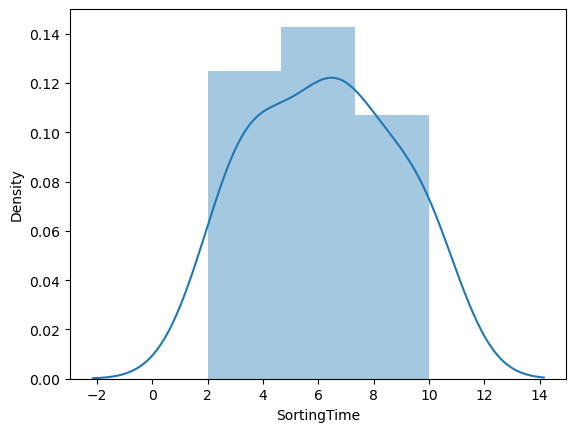

In [21]:
sns.distplot(df['SortingTime'])

<AxesSubplot:xlabel='DeliveryTime', ylabel='Density'>

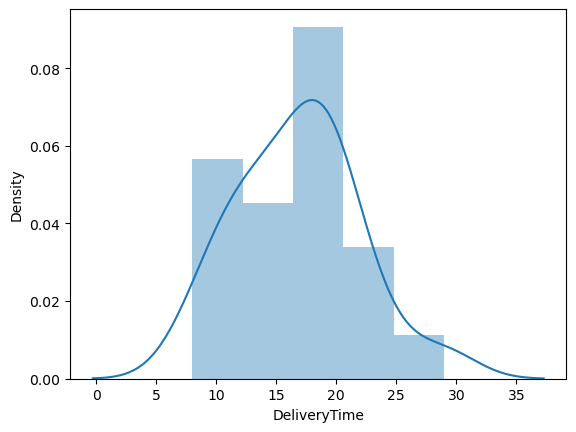

In [23]:
sns.distplot(df['DeliveryTime'])

In [24]:
# As you can see, both the graphs are normally distributed.
# Therefore very less amount of skewness is present which we can neglect. 

# Correlation between both columns. 

In [25]:
df.corr()

,SortingTime,DeliveryTime
SortingTime,1.000000,0.825997
DeliveryTime,0.825997,1.000000


In [ ]:
# There should always be strong relationship between target and independent column. 
# In our case we have 82% coorelation values which is pretty acceptable

<AxesSubplot:>

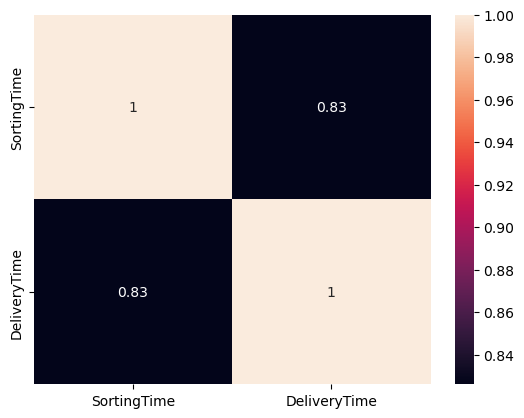

In [28]:
sns.heatmap(df.corr(), annot=True)

# Model Building

In [29]:
import statsmodels.formula.api as smf

In [30]:
model = smf.ols('DeliveryTime~SortingTime', data = df).fit()

In [31]:
# .fit() value is responsible to get your m and c value. i.e. slope and intercept value
# Without .fit() our model will not do any calculations.

In [32]:
# Here our model is built and now its time to check the accuracy of the model.

# Model Accuracy 

In [34]:
model.rsquared

0.6822714748417231

In [35]:
# Our model is able to give us 68% accuracy which is not at all acceptable. 
# Therefore we need to perform log or square root transfrmation. 

# Log Transformation. 

In [41]:
df['log_SortingTime'] = np.log(df['SortingTime'])

In [42]:
df.head()

,SortingTime,DeliveryTime,log_SortingTime
0,2.302585,3.044522,0.834032
1,1.386294,2.602690,0.326634
2,1.791759,2.983153,0.583198
3,2.197225,3.178054,0.787195
4,2.302585,3.367296,0.834032


In [43]:
df['log_DeliveryTime'] = np.log(df['DeliveryTime'])

In [44]:
df.head()

,SortingTime,DeliveryTime,log_SortingTime,log_DeliveryTime
0,2.302585,3.044522,0.834032,1.113344
1,1.386294,2.602690,0.326634,0.956545
2,1.791759,2.983153,0.583198,1.092981
3,2.197225,3.178054,0.787195,1.156269
4,2.302585,3.367296,0.834032,1.214110


# New model using log tranformation

In [48]:
log_Model = smf.ols('log_DeliveryTime~log_SortingTime', data = df).fit()

In [49]:
# Here our new model is built based on log transformation. 

In [ ]:
# Let us check the accuracy of the model. 

In [50]:
log_Model.rsquared

0.8025094580937898

In [51]:
# As we can witness, there is a drastic improvement in model accuracy. 
# Before it was 68% and now it is 80%, which is considered pretty good. 

In [ ]:
# let us try to build model based on square root transformation

# New model using square root transformation

In [52]:
df['sqrt_SortingTime'] = np.sqrt(df['SortingTime'])

In [53]:
df.head()

,SortingTime,DeliveryTime,log_SortingTime,log_DeliveryTime,sqrt_SortingTime
0,2.302585,3.044522,0.834032,1.113344,1.517427
1,1.386294,2.602690,0.326634,0.956545,1.177410
2,1.791759,2.983153,0.583198,1.092981,1.338566
3,2.197225,3.178054,0.787195,1.156269,1.482304
4,2.302585,3.367296,0.834032,1.214110,1.517427


In [54]:
df['sqrt_DeliveryTime'] = np.sqrt(df['DeliveryTime'])

In [55]:
df.head()

,SortingTime,DeliveryTime,log_SortingTime,log_DeliveryTime,sqrt_SortingTime,sqrt_DeliveryTime
0,2.302585,3.044522,0.834032,1.113344,1.517427,1.744856
1,1.386294,2.602690,0.326634,0.956545,1.177410,1.613285
2,1.791759,2.983153,0.583198,1.092981,1.338566,1.727181
3,2.197225,3.178054,0.787195,1.156269,1.482304,1.782710
4,2.302585,3.367296,0.834032,1.214110,1.517427,1.835019


In [56]:
sqrt_model = smf.ols('sqrt_DeliveryTime~sqrt_SortingTime', data = df).fit()

In [57]:
df.head()

,SortingTime,DeliveryTime,log_SortingTime,log_DeliveryTime,sqrt_SortingTime,sqrt_DeliveryTime
0,2.302585,3.044522,0.834032,1.113344,1.517427,1.744856
1,1.386294,2.602690,0.326634,0.956545,1.177410,1.613285
2,1.791759,2.983153,0.583198,1.092981,1.338566,1.727181
3,2.197225,3.178054,0.787195,1.156269,1.482304,1.782710
4,2.302585,3.367296,0.834032,1.214110,1.517427,1.835019


In [58]:
sqrt_model.rsquared

0.7901177427641342

In [62]:
# Since sqrt transformation is also able to give us 79% accuracy. 
# Therefore We will proceed our model prediction using logarithmically transformed data. 

In [63]:
# The amount of data that is present for our model building and model learning is moderately less in our case 
# Therefore our model is not able to have accuracy more than 80%